# NY Motor Vehicle Collisions – Exploratory Data Analysis  
In this notebook, we analyze New York’s Vehicular crash data available at https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95


The data contains information from all police reported motor vehicle collisions in NYC. The information for this dataset is collated from the police report, called MV104-AN, which is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

Data is available from 2012-07-01 onwards, however for this analysis, we will limit ourselves to the period up to 2023-08-15, which is when the data was downloaded.

We find that this data contains over 2 million observations, which allows us to explore several aspects of vehicle crashes in NY's boroughs.

The data dictionary for the data is also available at the URL above.

First, we perform unstructured exploration of the data, and then try to answer the following questions:

- We look for which borough has had the maximum number of crashes reported since 2012.

- We relate the number of crashes to to the borough's population to find out which borough has the maximum number of crashes for every 100,000 people. Even though the data does not have this information, we can combine the crash data with the population estimates for the boroughs also available from the City of New York's website (https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9)

| Borough | Population |
| --- | --- |
| Bronx | 1446788 |
| Brooklyn | 2648452 |
| Manhattan | 1638281 |
| Queens | 2330295 |
| Staten Island | 487155 |  

  
- We look for the leading cause of crashes

- We also look for the top-3 causes of crashes, and try to calculate what proportion of all crashes are caused by these top-3 causes.

- We then look to some of the more serious implications of crashes by examining how many accidents involved at least one fatality.

- We then compute, on average, out of every 1000 accidents, how many have resulted in at least one person dead.

- We also look for missing data and try to compute the proportion of accidents in the data that do not have a Borough code.

- The fields 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' represent the first two vehicles involved in the accident.  We look for which combinations of vehicles have the most number of accidents.


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import phik
from IPython.display import Markdown as md

In [10]:
df = pd.read_pickle(r"shared/Motor_Vehicle_Collisions_-_Crashes.pkl")
df

,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


***
### Show some exploratory data analysis here
***

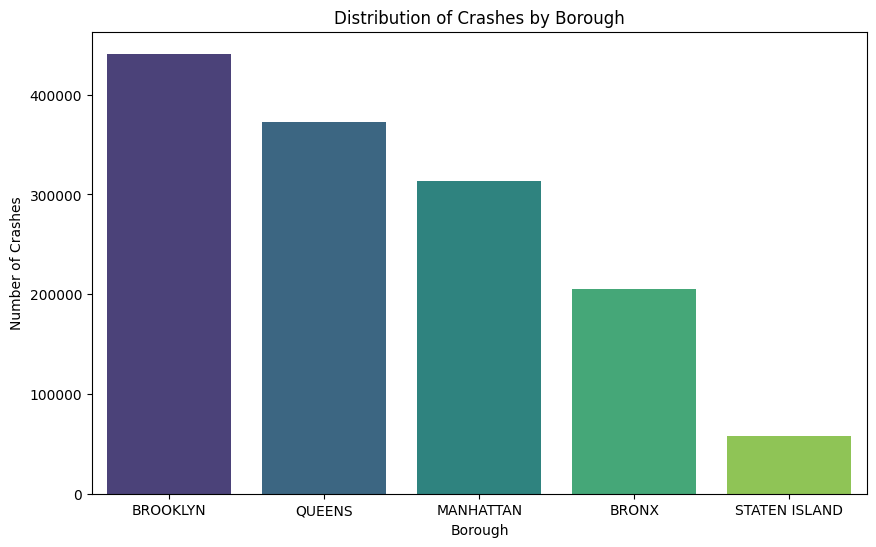

In [3]:
# Count the number of crashes per borough
crashes_by_borough = df['BOROUGH'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=crashes_by_borough.index, y=crashes_by_borough.values, palette='viridis')
plt.title('Distribution of Crashes by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.show()


## Borough with the maximum number of crashes reported since 2012

In [14]:
# Assuming 'df' is your DataFrame containing the crash data

# Step 1: Filter out rows with missing values in relevant columns
df_cleaned = df.dropna(subset=['BOROUGH', 'CRASH DATE_CRASH TIME'])

# Step 2: Extract the year from the 'CRASH DATE_CRASH TIME' column
df_cleaned.loc[:, 'CRASH YEAR'] = pd.to_datetime(df_cleaned['CRASH DATE_CRASH TIME']).dt.year

# Step 3: Filter the data for years since 2012
df_since_2012 = df_cleaned[df_cleaned['CRASH YEAR'] >= 2012]

# Step 4: Group by borough and count the total number of crashes
crash_counts_by_borough = df_since_2012.groupby('BOROUGH')['CRASH DATE_CRASH TIME'].count().reset_index()

# Step 5: Find the borough with the highest total number of crashes since 2012
highest_crash_borough = crash_counts_by_borough[crash_counts_by_borough['CRASH DATE_CRASH TIME'] == crash_counts_by_borough['CRASH DATE_CRASH TIME'].max()]['BOROUGH'].values[0]

highest_crash_borough


/tmp/ipykernel_335/3990424556.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'CRASH YEAR'] = pd.to_datetime(df_cleaned['CRASH DATE_CRASH TIME']).dt.year


'BROOKLYN'

## Borough with the maximum number of crashes adjusted for population

In [18]:
# Provided population estimates
population_data = {
    'BRONX': 1446788,
    'BROOKLYN': 2648452,
    'MANHATTAN': 1638281,
    'QUEENS': 2330295,
    'STATEN ISLAND': 487155
}

# Step 1: Calculate total number of crashes for each borough since July 2012
total_crashes_by_borough = df['BOROUGH'].value_counts()

# Step 2: Get the population for each borough
borough_population = pd.Series(population_data)

# Step 3: Calculate the number of crashes per 100,000 people for each borough
crashes_per_100k = (total_crashes_by_borough / borough_population) * 100000

# Find the borough with the highest number of crashes per 100,000 people
highest_crashes_per_100k = crashes_per_100k.idxmax()
highest_crashes_value = crashes_per_100k.max()

highest_crashes_per_100k, highest_crashes_value


('MANHATTAN', 19121.628096767283)

## Analyzing the leading cause of crashes

In [19]:
# Step 1: Remove rows where 'CONTRIBUTING FACTOR VEHICLE 1' is 'Unspecified'
df_filtered = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Step 2: Find the leading cause of crashes
leading_cause = df_filtered['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().idxmax()

# Step 3: Calculate the proportion of accidents attributable to this cause
proportion = df_filtered['CONTRIBUTING FACTOR VEHICLE 1'].value_counts(normalize=True)[leading_cause]

leading_cause, proportion


('Driver Inattention/Distraction', 0.3041797020985308)

## Top 3 causes of crashes 

In [20]:
# Step 1: Get the counts of each contributing factor (excluding 'Unspecified')
top_contributing_factors = df_filtered['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(3)

# Step 2: Calculate the total number of crashes
total_crashes = len(df_filtered)

# Step 3: Calculate the proportion of total crashes accounted for by the top 3 causes
proportion_top_3 = top_contributing_factors.sum() / total_crashes

proportion_top_3


0.4737010461641528

## Analyzing fatalities

In [21]:
# Step 1: Filter rows where at least one person was killed
fatal_accidents = df[df['NUMBER OF PERSONS KILLED'] > 0]

# Step 2: Get the total count of accidents with at least one fatality
total_fatal_accidents = len(fatal_accidents)

total_fatal_accidents


2804

## Likelihood of fatal accidents
#### On average, out of every 1000 accidents, how many have resulted in at least one person dead?

In [22]:
# Step 1: Get the total count of accidents with at least one fatality
total_fatal_accidents = len(fatal_accidents)

# Step 2: Get the total count of accidents
total_accidents = len(df)

# Step 3: Calculate the average number of accidents with at least one fatality per 1000 accidents
avg_fatalities_per_1000 = (total_fatal_accidents / total_accidents) * 1000

avg_fatalities_per_1000


1.3893258747079764

## Missing data
#### What proportion of accidents in the data do not have a Borough code?

In [23]:
# Step 1: Filter rows where 'BOROUGH' is missing
accidents_missing_borough = df[df['BOROUGH'].isnull()]

# Step 2: Get the total count of accidents with missing Borough codes
total_missing_borough = len(accidents_missing_borough)

# Step 3: Get the total count of accidents
total_accidents = len(df)

# Step 4: Calculate the proportion of accidents with missing Borough codes
proportion_missing_borough = total_missing_borough / total_accidents

proportion_missing_borough


0.3110890897784957

## Which combinations of vehicles have the most number of accidents

In [24]:
# Step 1: Group by combinations of vehicle types and count the number of accidents
vehicle_combinations = df.groupby(['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']).size().reset_index(name='Count')

# Step 2: Find the combination with the most number of accidents
most_common_combination = vehicle_combinations.sort_values(by='Count', ascending=False).iloc[0]

most_common_combination


VEHICLE TYPE CODE 1     Sedan
VEHICLE TYPE CODE 2     Sedan
Count                  197944
Name: 3948, dtype: object

***  
## Finished